<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
#Import Lib
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn import tree
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Read the data
# breast-cancer-wisconsin-data-old.csv

bc_csv = 'breast-cancer-wisconsin.data'
data = pd.read_csv(bc_csv) #replace ? with NA - na_values = '?'


In [4]:
data.columns = ['ID','Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape','Marginal Adhesion',
                'Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
data = data.set_index('ID')
index = data.index
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,,,,,,,,,,
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2
1017122,8,10,10,8,7,10,9,7,1,4


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [5]:
#Prev answer: Column Bare Nuclei has a non int input '?' will be dropping 16 rows
data['Bare Nuclei'].value_counts(normalize = True) #check whether to use mean/median to replace NA

1     0.574499
10    0.189112
2     0.042980
5     0.042980
3     0.040115
8     0.030086
4     0.027221
?     0.022923
9     0.012894
7     0.011461
6     0.005731
Name: Bare Nuclei, dtype: float64

In [6]:
data1 = data[data['Bare Nuclei'] != '?']
median = int(data1['Bare Nuclei'].median()) #check median of columns
median

1

In [7]:
data['Bare Nuclei'].replace('?',median, inplace = True)
data['Bare Nuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [8]:
data['Bare Nuclei'] = data['Bare Nuclei'].astype(int)
data['Bare Nuclei'].value_counts()

1     417
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [9]:
# data = data[data['Bare Nuclei'] != '?']
# data['Bare Nuclei'].value_counts()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 698 entries, 1002945 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              698 non-null    int64
 1   Uniformity of Cell Size      698 non-null    int64
 2   Uniformity of Cell Shape     698 non-null    int64
 3   Marginal Adhesion            698 non-null    int64
 4   Single Epithelial Cell Size  698 non-null    int64
 5   Bare Nuclei                  698 non-null    int32
 6   Bland Chromatin              698 non-null    int64
 7   Normal Nucleoli              698 non-null    int64
 8   Mitoses                      698 non-null    int64
 9   Class                        698 non-null    int64
dtypes: int32(1), int64(9)
memory usage: 57.3 KB


In [10]:
# replace class to 0 and 1
data['Class'].replace(2, 0, inplace=True)
data['Class'].replace(4, 1, inplace=True)

In [11]:
data['Class'].value_counts()

0    457
1    241
Name: Class, dtype: int64

In [12]:
# Number of features

print('- Number of features: %d' % data.shape[1])
for c in data.columns:
    print(' - %s' % c)
    
#Data types
print('\n- Data types')
print(data.dtypes)

#Domains, Intervals
print('\n- Domains, Intervals')
for c in data.columns:
    x = data[c].unique()
    x.sort()
    print(' - %-16s: min: %d, max: %d' % (c, data[c].min(), data[c].max()))
    print(' values: %s' % x)

#null values
print('\n- Nulls')
for c in data.columns:
    print(' -%-16s: Nulls: %d' % (c,data[c].isna().sum()))

- Number of features: 10
 - Clump Thickness
 - Uniformity of Cell Size
 - Uniformity of Cell Shape
 - Marginal Adhesion
 - Single Epithelial Cell Size
 - Bare Nuclei
 - Bland Chromatin
 - Normal Nucleoli
 - Mitoses
 - Class

- Data types
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int32
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

- Domains, Intervals
 - Clump Thickness : min: 1, max: 10
 values: [ 1  2  3  4  5  6  7  8  9 10]
 - Uniformity of Cell Size: min: 1, max: 10
 values: [ 1  2  3  4  5  6  7  8  9 10]
 - Uniformity of Cell Shape: min: 1, max: 10
 values: [ 1  2  3  4  5  6  7  8  9 10]
 - Marginal Adhesion: min: 1, max: 10
 values: [ 1  2  3  4  5  6  7  8  9 10]
 - Single Epithelial Cell Si

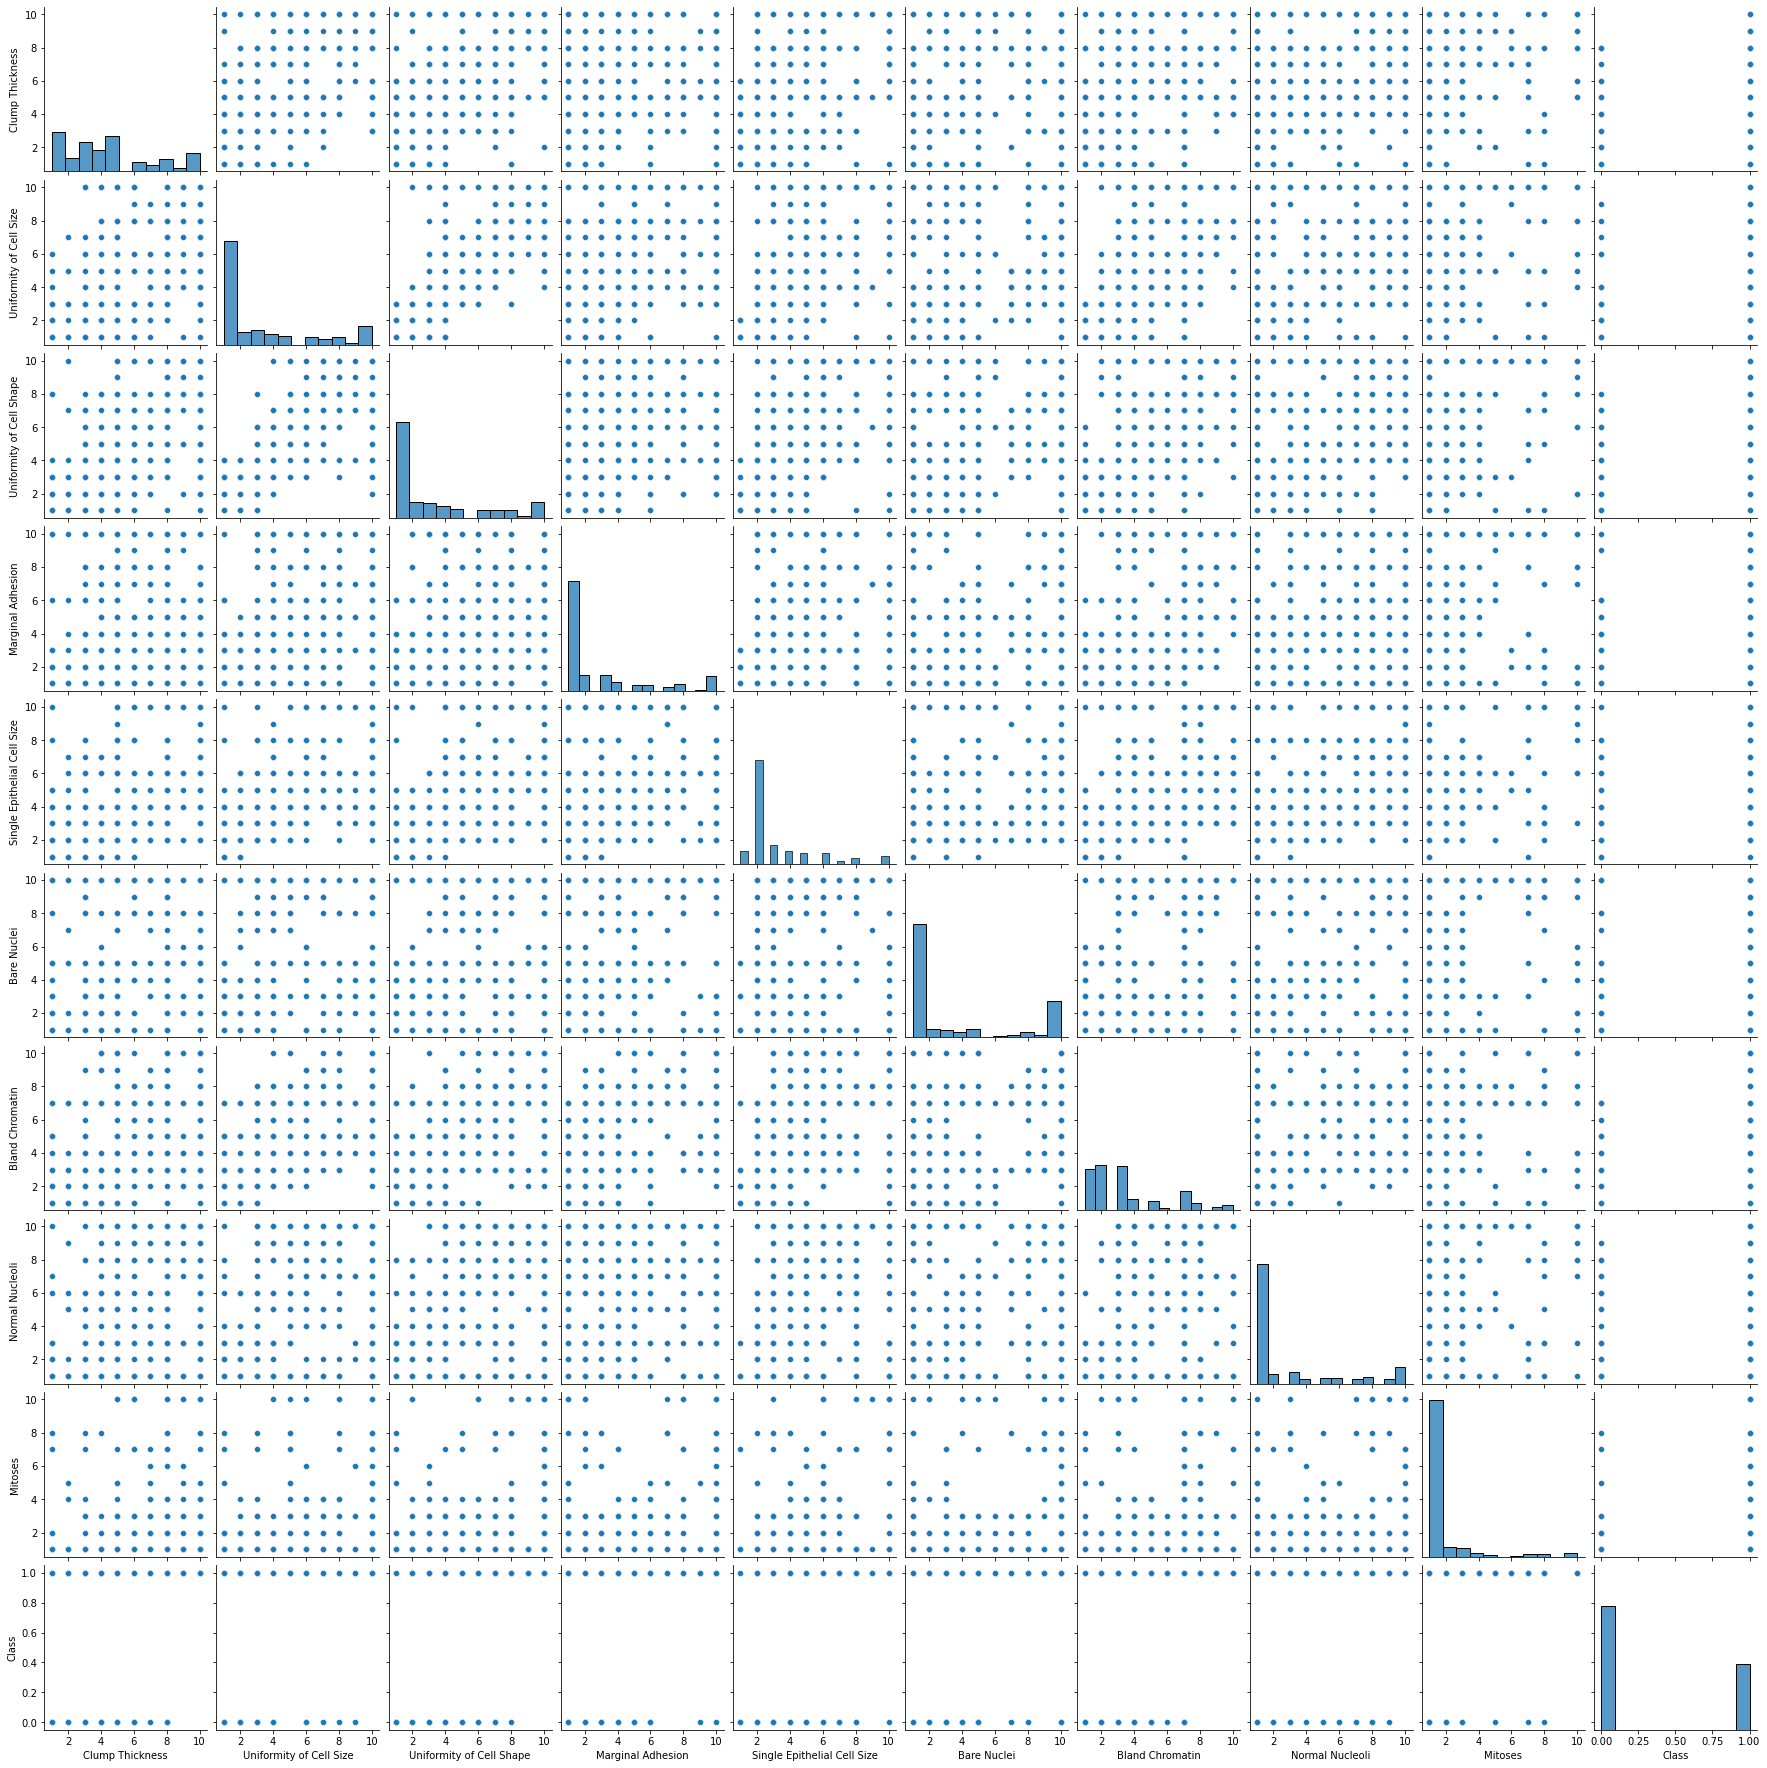

In [13]:
sns.pairplot(data)

In [14]:
#Normalisation convert all ranges to 0-1

scaler = MinMaxScaler(feature_range = (0,1))
normalizedData = scaler.fit_transform(data)

In [15]:
normalizedData.shape

(698, 10)

In [16]:
#move the data back to a dataframe
df_n = pd.DataFrame.from_records(normalizedData, columns = data.columns, index = index)
df_n['Class'] = df_n['Class'].astype(np.int8)
df_n.sample(10)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
ID,,,,,,,,,,
1171795,0.000000,0.222222,0.000000,0.111111,0.111111,0.111111,0.444444,0.222222,0.111111,0
1105524,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0
1231853,0.333333,0.111111,0.111111,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0
1223282,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0
1330361,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000,0
1171710,0.555556,0.444444,0.333333,0.333333,0.222222,0.888889,0.666667,0.777778,0.222222,1
1136142,0.111111,0.000000,0.000000,0.000000,0.222222,0.000000,0.111111,0.000000,0.000000,0
558538,0.333333,0.000000,0.222222,0.222222,0.111111,0.000000,0.000000,0.000000,0.000000,0
1169049,0.666667,0.222222,0.333333,0.333333,0.222222,0.222222,0.222222,0.111111,0.666667,1


In [17]:
df_n.shape

(698, 10)

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [18]:
#create X and Y

features= df_n.drop('Class', axis=1)
outcome = 'Class'


# X include all the features
X = features.copy()

#y is the target variable
#As it is a classification problem, 0 and 1 are converted from int to str
#y = data[outcome].astype(str).copy()

y = df_n[outcome]

In [19]:
# Split your data
test_size = X.shape[0]-500

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100666001, stratify = y)
#stratify to maintain ration of outcome 0 & 1

In [20]:
y_train.value_counts()

0    327
1    173
Name: Class, dtype: int64

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [22]:
# Define ML model(s)
dtc = DecisionTreeClassifier()
bag= BaggingClassifier(base_estimator=dtc, n_estimators=100, random_state = None)
kfold = KFold(n_splits = 10, random_state = None)

In [23]:
# Fit model with decision tree
dtc.fit(X_train, y_train)
results_dt = cross_val_score(dtc, X_train, y_train, cv= kfold)
print('Decision Tree, Cross-Validation mean: %.4f' % results_dt.mean())

Decision Tree, Cross-Validation mean: 0.9500


In [24]:
#fit model with bagging
bag.fit(X_train, y_train)
results_bag = cross_val_score(bag, X_train, y_train, cv= kfold)
print('Bagging, Cross-Validation mean: %.4f' % results_bag.mean())

Bagging, Cross-Validation mean: 0.9680


# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [29]:
# helper function to show results and charts
def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)

    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, prediction)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % accuracy_)
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % precision_)
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % recall_)
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % roc_auc_)
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


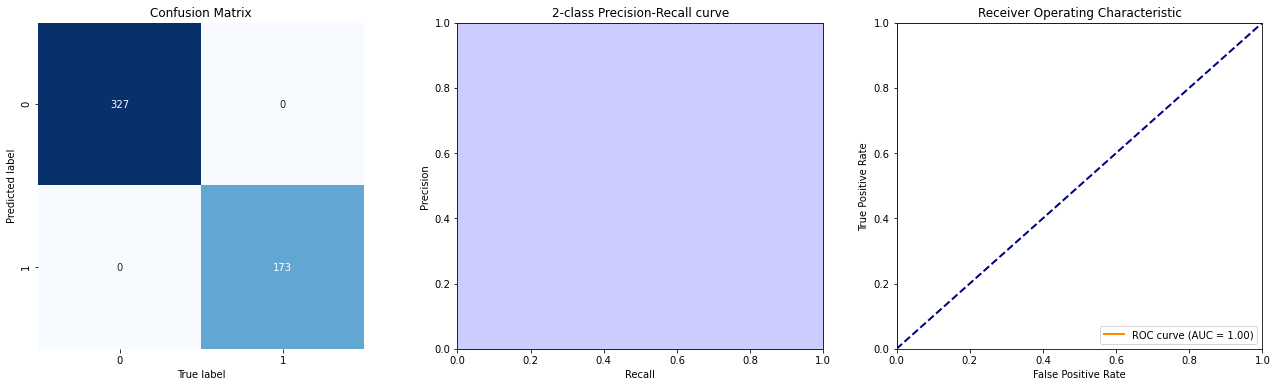


****************
* Bagging (DT) *
****************
Accuracy : 1.0000 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 1.0000 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 1.0000 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 1.0000                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


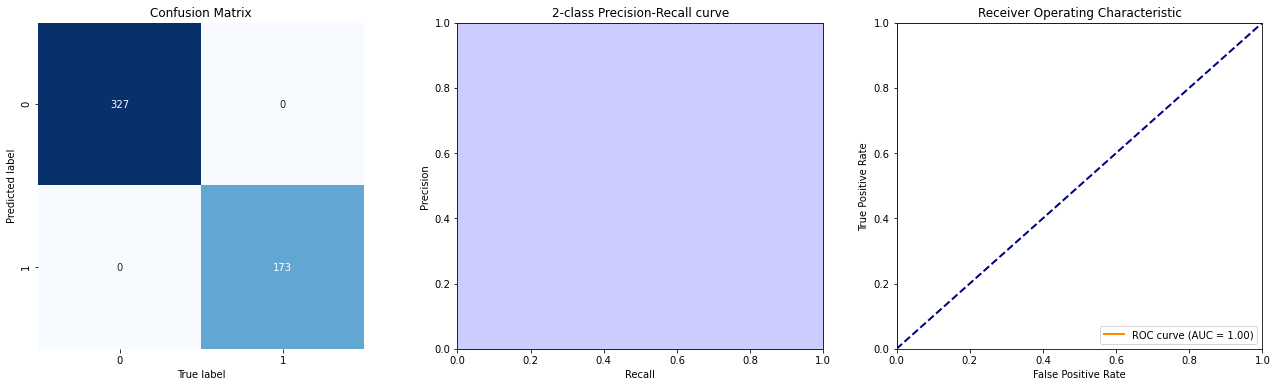

In [28]:
#Keep results in a dataframe

results = pd.DataFrame (columns = ['Model', 'Accuracy','Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Bagging (DT)']
for i, m in enumerate([dtc, bag]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' %models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    
    #show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions)
    
    #keep the results
    results.loc[i] = {'Model':models[i],
                     'Accuracy': accuracy_,
                     'Precision': precision_,
                     'Recall': recall_,
                     'ROC_AUC': roc_auc_}
    print()

In [30]:
results


,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,1.0,1.0,1.0,1.0
1,Bagging (DT),1.0,1.0,1.0,1.0


# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [31]:
#DTC
y_test_pred_dtc = dtc.predict(X_test)

Accuracy : 0.9545 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9275 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9412 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9514                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


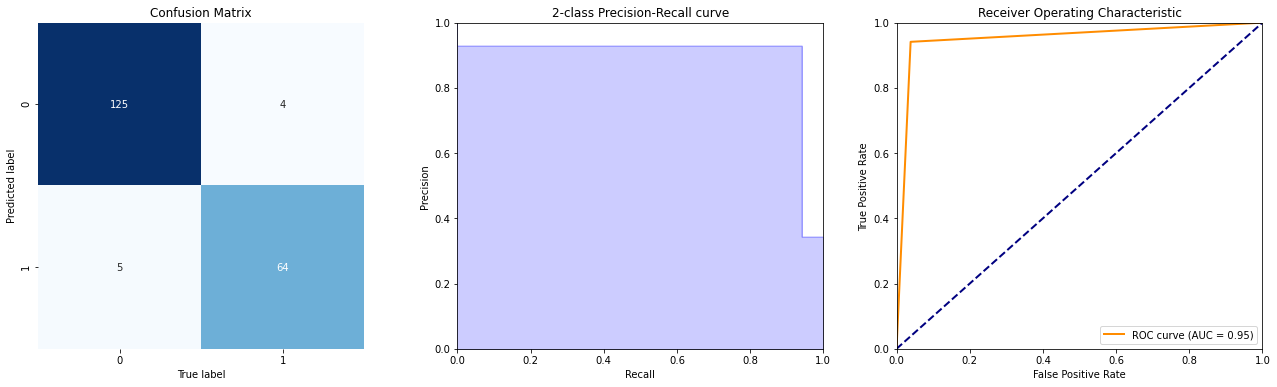

In [32]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, y_test_pred_dtc)

#keep the result
results.loc[len(results)] = {
    'Model':'Decision Tree (with test)',
    'Accuracy': accuracy_,
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [33]:
#Bagging
y_test_pred_bag = bag.predict(X_test)

Accuracy : 0.9495 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9265 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.9265 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9440                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


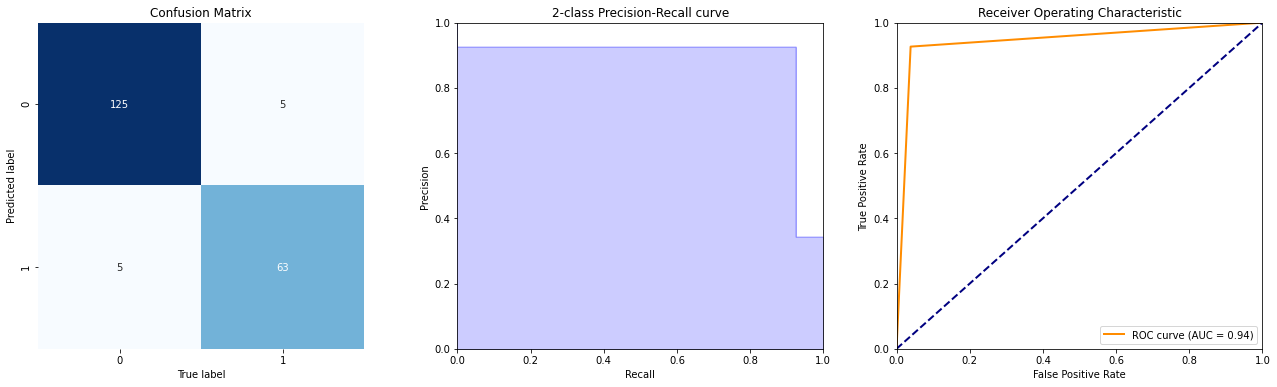

In [34]:
accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_test, y_test_pred_bag)

#keep the result
results.loc[len(results)] = {
    'Model':'Bagging (with test)',
    'Accuracy': accuracy_,
    'Precision': precision_,
    'Recall': recall_,
    'ROC_AUC': roc_auc_}
print()

In [35]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,1.000000,1.000000,1.000000,1.000000
1,Bagging (DT),1.000000,1.000000,1.000000,1.000000
2,Decision Tree (with test),0.954545,0.927536,0.941176,0.951357
3,Bagging (with test),0.949495,0.926471,0.926471,0.944005


# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



